In [2]:
tour = [1, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 21, 20, 19, 18, 16, 15, 14, 13, 17, 22, 23, 12, 11, 24, 27, 26, 25, 10, 9, 8, 3, 7, 6, 5, 4, 42, 2]

In [3]:
import tsplib95 
import networkx as nx
import time
start_time = time.time()
problem = tsplib95.load('dantzig42.tsp')
G = problem.get_graph()

In [8]:
# D_c = 20

# covered_nodes = set()

# new_tour = tour.copy()

# for node in tour:
#     if node in covered_nodes:
#         new_tour.remove(node)
#         continue
#     for other_node in tour:
#         if other_node != node and problem.get_weight(node, other_node) <= D_c:
#             covered_nodes.add(other_node)
# print(new_tour)


[1, 40, 37, 34, 33, 30, 21, 20, 19, 18, 16, 15, 13, 17, 22, 12, 24, 10, 8]


In [4]:
D_c = 20

covered_nodes = set()
coverage_point = {}  # 这个字典用来跟踪每个节点的覆盖来源
covered_by = {node: [] for node in tour}  # 这个字典用来跟踪每个节点所覆盖的其他节点

new_tour = tour.copy()
multiple_covered = {}  # 这个字典用来跟踪被多次覆盖的节点

for node in tour:
    if node in covered_nodes:
        new_tour.remove(node)
        continue
    for other_node in tour:
        if other_node != node and problem.get_weight(node, other_node) <= D_c:
            # 如果other_node已经被覆盖
            if other_node in coverage_point:
                if coverage_point[other_node] != node:  # 判断是否被其他节点覆盖
                    if other_node not in multiple_covered:
                        multiple_covered[other_node] = [coverage_point[other_node]]  # 首次发现
                    multiple_covered[other_node].append(node)  # 增加新的覆盖来源
                # 如果当前节点与other_node之间的距离更远，则继续下一次迭代
                if problem.get_weight(coverage_point[other_node], other_node) <= problem.get_weight(node, other_node):
                    continue
            covered_nodes.add(other_node)
            coverage_point[other_node] = node  # 更新或设置other_node的覆盖来源
            covered_by[node].append(other_node)  # 添加other_node到当前节点的覆盖列表

print(new_tour)
for node in new_tour:
    print(f" {node} cover: {covered_by[node]}")


for node, sources in multiple_covered.items():
    actual_source = coverage_point[node]  # 实际的覆盖来源，即距离最近的
    print(f"{node} is covered by {sources}, but its actual coverage_point is Node {actual_source}.")
end_time = time.time()
print(f"Runtime of the code is {end_time - start_time} seconds")

[1, 40, 37, 34, 33, 30, 21, 20, 19, 18, 16, 15, 13, 17, 22, 12, 24, 10, 8]
 1 cover: [41, 42, 2]
 40 cover: [39, 38, 5]
 37 cover: [38, 36, 35]
 34 cover: [35, 32, 31]
 33 cover: [32]
 30 cover: [31, 29, 28]
 21 cover: []
 20 cover: []
 19 cover: []
 18 cover: []
 16 cover: []
 15 cover: [14]
 13 cover: []
 17 cover: []
 22 cover: [23]
 12 cover: [11]
 24 cover: [27, 26, 25]
 10 cover: [9]
 8 cover: [9, 3, 7, 6, 4]
38 is covered by [40, 37], but its actual coverage_point is Node 37.
35 is covered by [37, 34], but its actual coverage_point is Node 34.
32 is covered by [34, 33, 30], but its actual coverage_point is Node 33.
31 is covered by [34, 30], but its actual coverage_point is Node 30.
25 is covered by [24, 10, 8], but its actual coverage_point is Node 24.
9 is covered by [10, 8], but its actual coverage_point is Node 8.
Runtime of the code is 1.9612231254577637 seconds


In [20]:
single_cover_data = {node: covered[0] for node, covered in covered_by.items() if len(covered) == 1}
newlst = {}
for cover_point, covered_point in single_cover_data.items():
    newlst[cover_point] = covered_point
    print(f"Point {cover_point} covers only point: {covered_point}")
newlst

Point 33 covers only point: 32
Point 15 covers only point: 14
Point 22 covers only point: 23
Point 12 covers only point: 11
Point 10 covers only point: 9


{33: 32, 15: 14, 22: 23, 12: 11, 10: 9}

In [27]:
for key, value in newlst.items():
    print(value)
    for i in range(len(new_tour)):
        if key == new_tour[i]:
            new_tour[i] = value
new_tour
            

32
14
23
11
9


[1, 40, 37, 34, 32, 30, 21, 20, 19, 18, 16, 14, 13, 17, 23, 11, 24, 9, 8]

In [55]:
new_tour = [1, 40, 37, 34, 32, 30, 21, 20, 19, 18, 16, 14, 13, 17, 23, 11, 24, 10, 8]

In [56]:
# 首先计算新路径的连线距离
new_tour_distance = 0
for i in range(len(new_tour) - 1):
    new_tour_distance += problem.get_weight(new_tour[i], new_tour[i + 1])

# 加上初始和末尾节点的距离abs
new_tour_distance += problem.get_weight(new_tour[-1], new_tour[0])

# 然后计算被覆盖的节点到其实际覆盖源的距离的一半
covered_nodes_distance = 0
for node, source in coverage_point.items():
    covered_nodes_distance += 0.5 * problem.get_weight(node, source)

# 将两个值相加以获取总距离
total_distance = new_tour_distance + covered_nodes_distance

print(f"Total distance of the new tour: {total_distance}")


Total distance of the new tour: 672.5


交换32，33：703

In [8]:
import tsplib95 
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from itertools import combinations
warnings.filterwarnings("ignore", category=Warning)
import matplotlib.pyplot as plt
import numpy as np
problem = tsplib95.load('dantzig42.tsp')
G = problem.get_graph()

In [47]:
pos = problem.display_data
print(pos)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

{1: [170.0, 85.0], 2: [166.0, 88.0], 3: [133.0, 73.0], 4: [140.0, 70.0], 5: [142.0, 55.0], 6: [126.0, 53.0], 7: [125.0, 60.0], 8: [119.0, 68.0], 9: [117.0, 74.0], 10: [99.0, 83.0], 11: [73.0, 79.0], 12: [72.0, 91.0], 13: [37.0, 94.0], 14: [6.0, 106.0], 15: [3.0, 97.0], 16: [21.0, 82.0], 17: [33.0, 67.0], 18: [4.0, 66.0], 19: [3.0, 42.0], 20: [27.0, 33.0], 21: [52.0, 41.0], 22: [57.0, 59.0], 23: [58.0, 66.0], 24: [88.0, 65.0], 25: [99.0, 67.0], 26: [95.0, 55.0], 27: [89.0, 55.0], 28: [83.0, 38.0], 29: [85.0, 25.0], 30: [104.0, 35.0], 31: [112.0, 37.0], 32: [112.0, 24.0], 33: [113.0, 13.0], 34: [125.0, 30.0], 35: [135.0, 32.0], 36: [147.0, 18.0], 37: [147.5, 36.0], 38: [154.5, 45.0], 39: [157.0, 54.0], 40: [158.0, 61.0], 41: [172.0, 82.0], 42: [174.0, 87.0]}


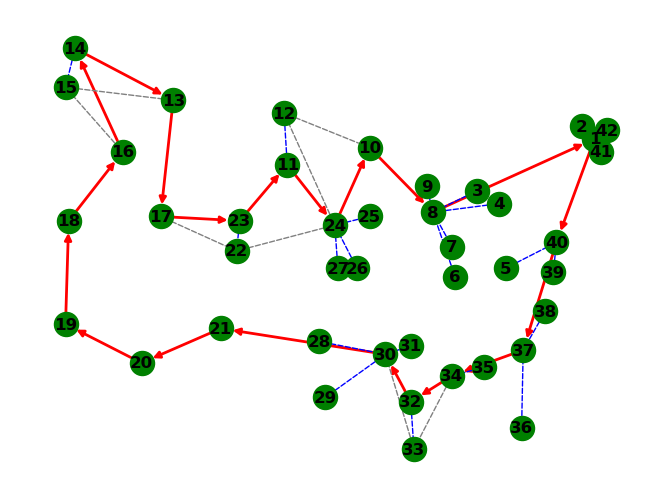

In [59]:
newG = nx.DiGraph()

# 首先，添加所有节点到newG
newG.add_nodes_from(G.nodes())

# 然后，将new_tour中的边添加到newG
for i in range(len(new_tour) - 1):
    newG.add_edge(new_tour[i], new_tour[i + 1])

    
newG.add_edge(new_tour[-1], new_tour[0])
    
nx.draw(newG, pos, with_labels=True, node_color='g', edge_color = 'white', font_weight='bold', arrows=False)

# 绘制new_tour的红色边
path_edges = [(new_tour[n], new_tour[n + 1]) for n in range(len(new_tour) - 1)]
path_edges.append((new_tour[-1], new_tour[0]))
nx.draw_networkx_edges(newG, pos, edgelist=path_edges, edge_color='r', width=2, 
                       arrowstyle='-|>', 
                       arrowsize=10)
yellow_dashed_edges = [(16,15),(15,13),(17,22),(22,24),(24,12),(12,10),(34,33),(33,30)]
nx.draw_networkx_edges(newG, pos, edgelist=yellow_dashed_edges, style='dashed', edge_color='grey', arrowstyle='-')

# 绘制从被覆盖的节点到其实际覆盖源的蓝色虚线
for node, source in coverage_point.items():
    nx.draw_networkx_edges(newG, pos, edgelist=[(node, source)], style='dashed', edge_color='b',arrowstyle = '-')
plt.savefig("improve.jpg")
plt.show()